# **Лабораторная работа**
## KNN (Spaceship-Titanic)
### Гребнев Глеб
### гр. 5030102/10201

## **Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **Загрузка данных**

In [292]:
path_to_file = "data.csv"
data = pd.read_csv(path_to_file)

**Первые несколько строк DataFrame:**

In [293]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Общая информация о данных**

In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Типы данных**

In [295]:
print(data.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


**Статические свойства**

In [296]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**Количество пропущенных значений в данных**

In [297]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## **Исследовательский анализ данных (EDA)**

**Распределение числовых признаков**

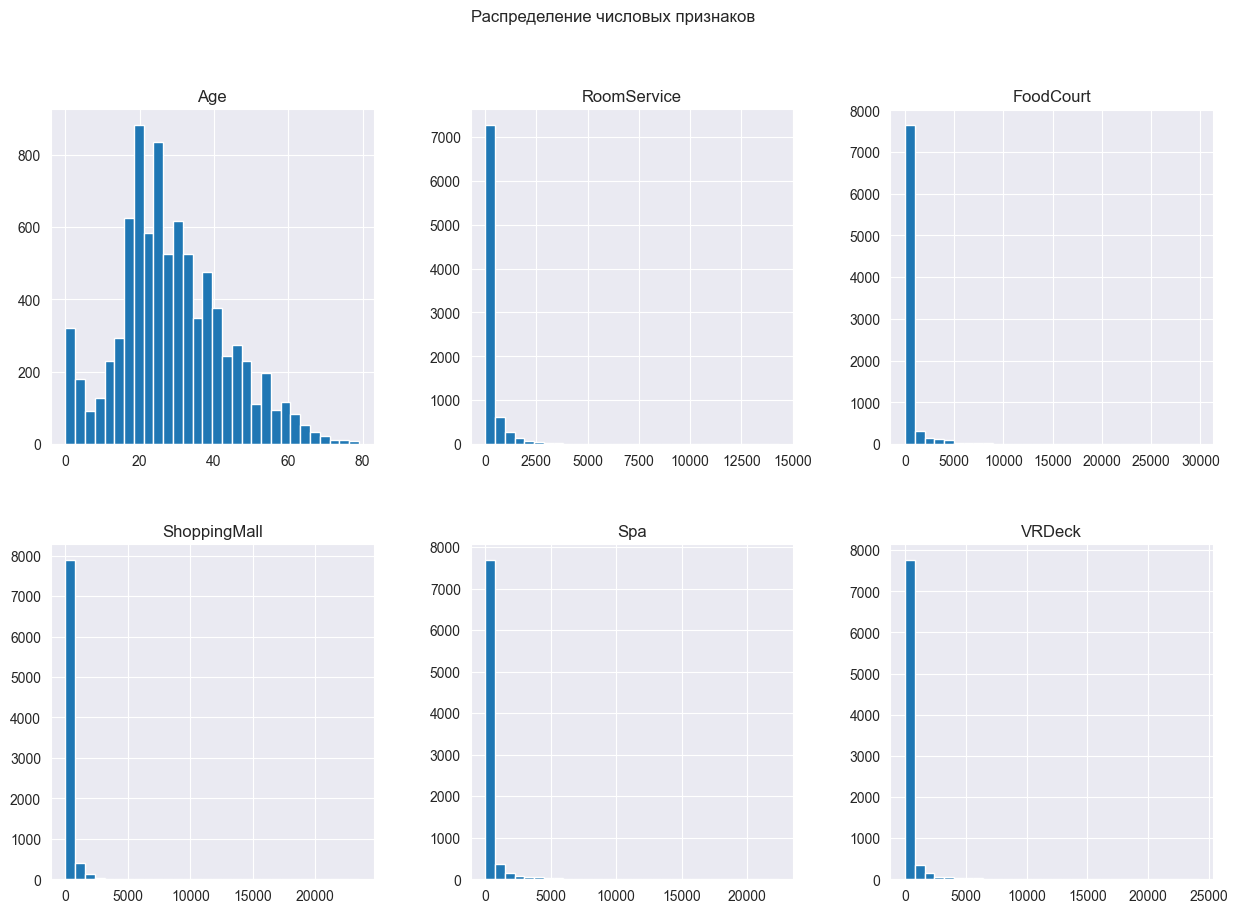

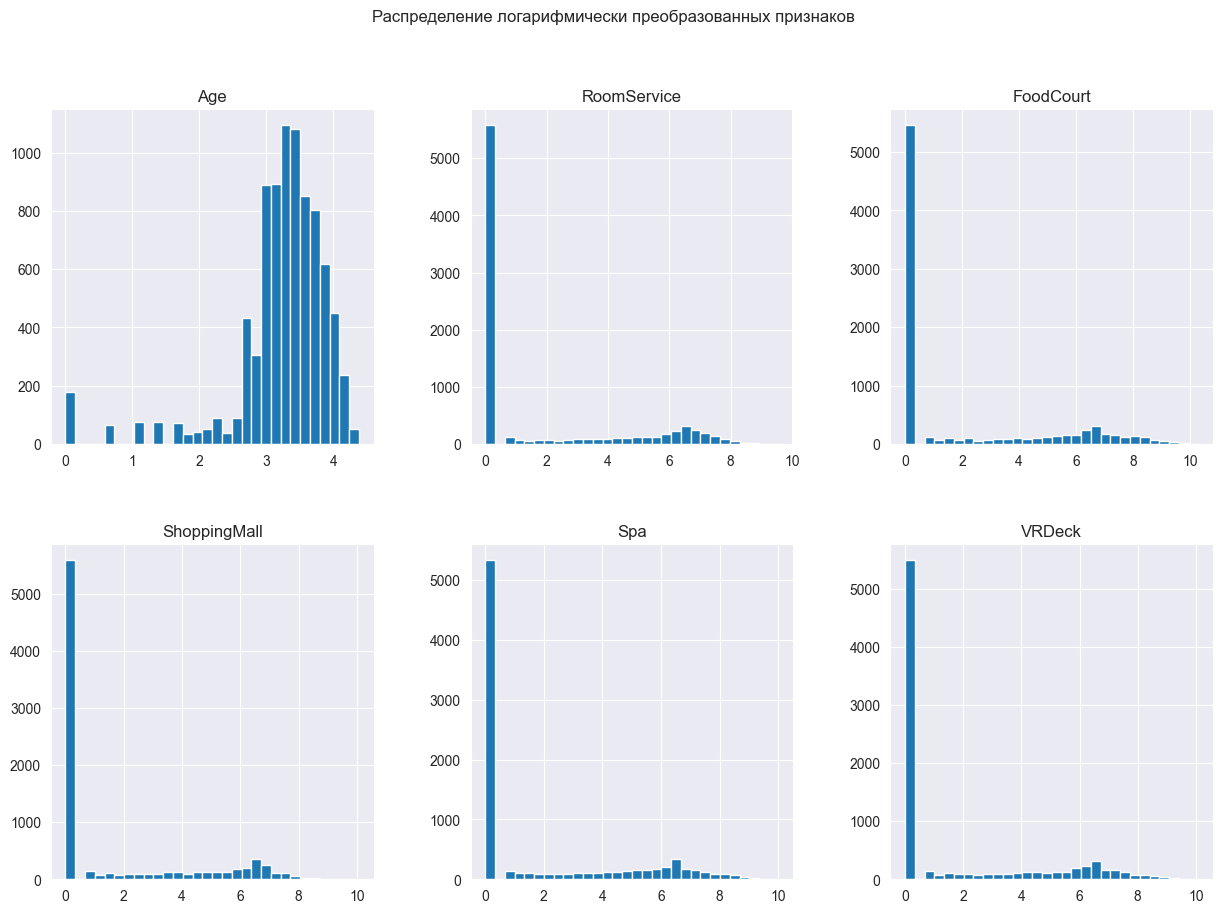

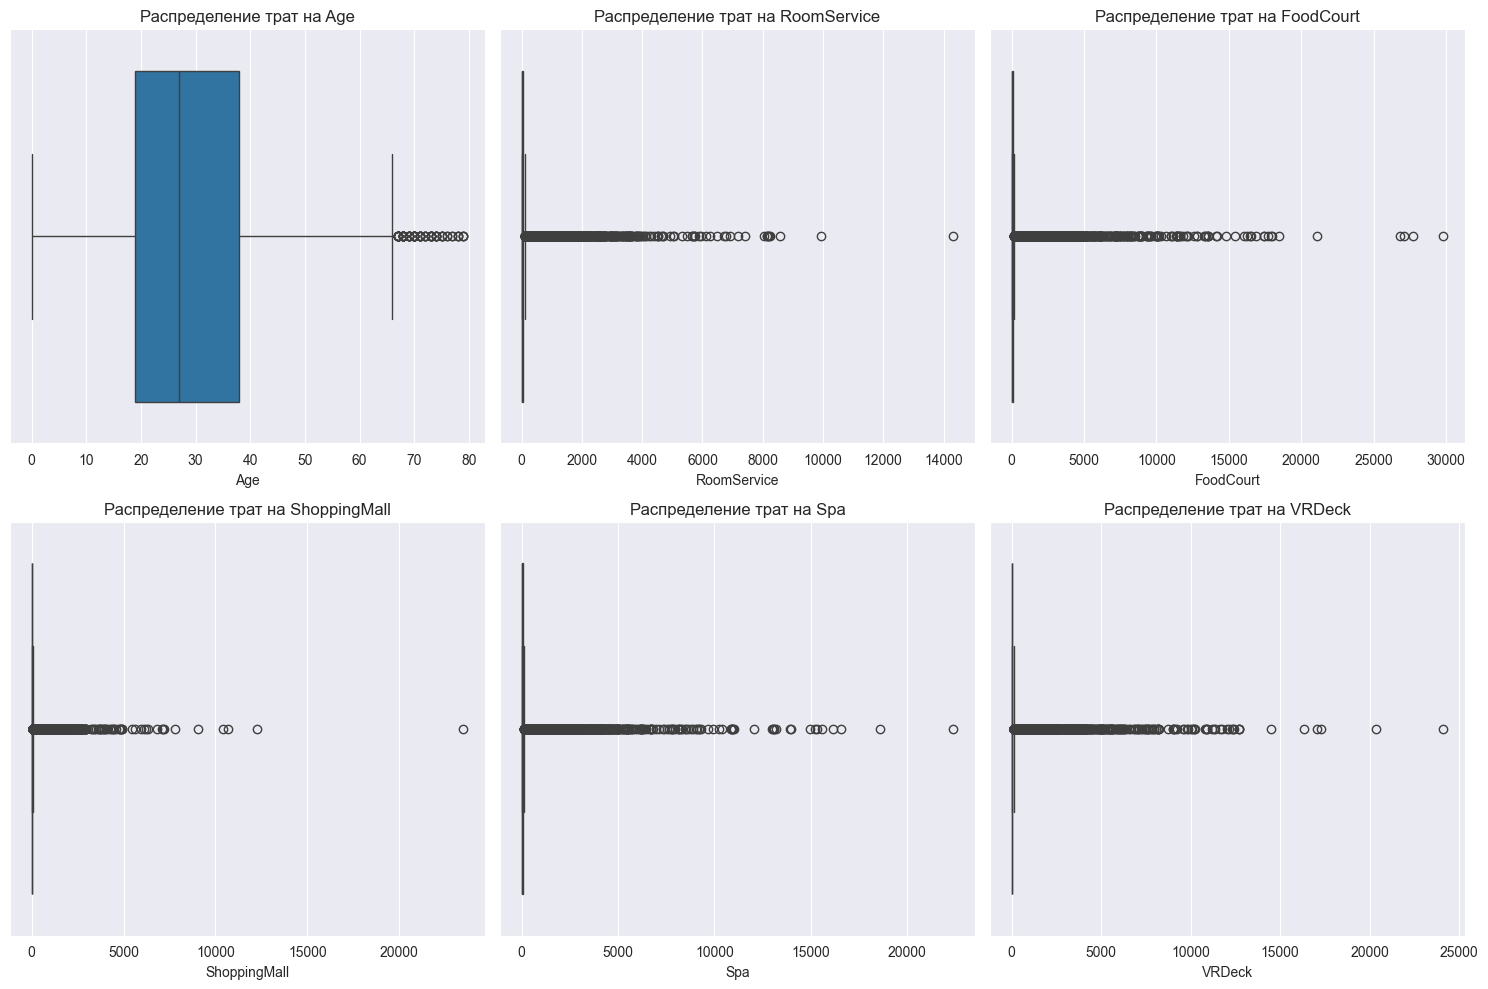

In [298]:
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
data[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Распределение числовых признаков')
plt.show()

log_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
data_log = data.copy()
for col in log_cols:
    data_log[col] = np.log1p(data_log[col])

data_log[log_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Распределение логарифмически преобразованных признаков')
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Распределение трат на {col}')
plt.tight_layout()
plt.show()


**Статистическое описание данных**

count     8693
unique       2
top       True
freq      4378
Name: Transported, dtype: object


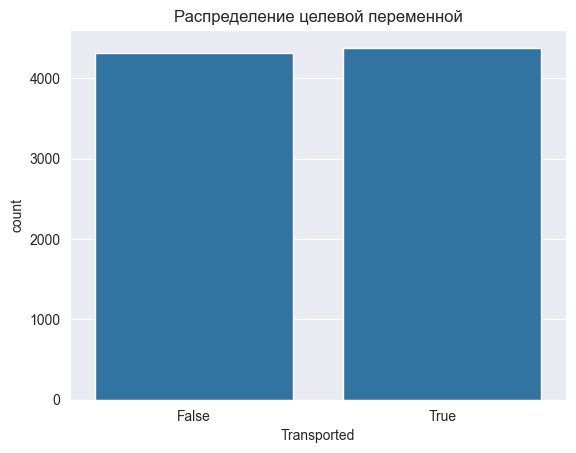

In [299]:
print(data['Transported'].describe())

sns.countplot(x='Transported', data=data)
plt.title('Распределение целевой переменной')
plt.show()

**Тепловая карта корреляции**

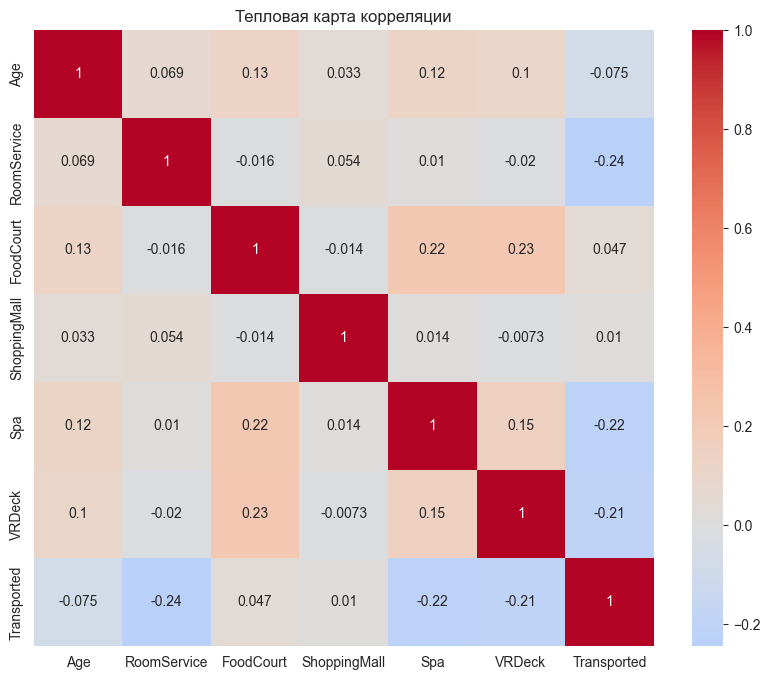

In [300]:
corr_matrix = data[numeric_cols + ['Transported']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляции')
plt.show()

## **3. Предаврительная обработка данных**

### **1. Обработка пропущенных значений**

In [301]:
print(f"Количество строк с пропущенными значениями: {data.isnull().any(axis=1).sum()}")
print(f"Общее количество строк в наборе данных: {len(data)}")
data = data.drop(columns=['PassengerId', 'Cabin', 'Name'])


Количество строк с пропущенными значениями: 2087
Общее количество строк в наборе данных: 8693


In [302]:
columns_to_fill = [col for col in data.columns if col not in ['PassengerId', 'Transported']]

for col in columns_to_fill:
    if data[col].dtype == 'object':
        data.loc[data[col].isnull(), col] = data[col].mode()[0]
    else:  # Для числовых признаков
        data.loc[data[col].isnull(), col] = data[col].median()
print(data.isnull().sum())

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


### **2. Обработка выбросов**

In [303]:
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in numeric_cols:
    non_zero_data = data[data[col] > 0][col]
    Q1 = non_zero_data.quantile(0.25)
    Q3 = non_zero_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = non_zero_data.median()
    data[col] = np.where((data[col] > upper_bound) & (data[col] > 0), median_value, data[col])

print(data[numeric_cols].describe())


               Age  RoomService    FoodCourt  ShoppingMall          Spa  \
count  8693.000000  8693.000000  8693.000000   8693.000000  8693.000000   
mean     28.368342   149.362821   183.509260    111.370643   125.133786   
std      13.727823   352.036329   455.616575    274.234224   301.565437   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%      20.000000     0.000000     0.000000      0.000000     0.000000   
50%      27.000000     0.000000     0.000000      0.000000     0.000000   
75%      37.000000    41.000000    61.000000     22.000000    53.000000   
max      65.000000  2058.000000  3080.000000   1698.000000  1877.000000   

            VRDeck  
count  8693.000000  
mean    127.088577  
std     310.643727  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%      40.000000  
max    1972.000000  


### Визуализация после обработки выбросов

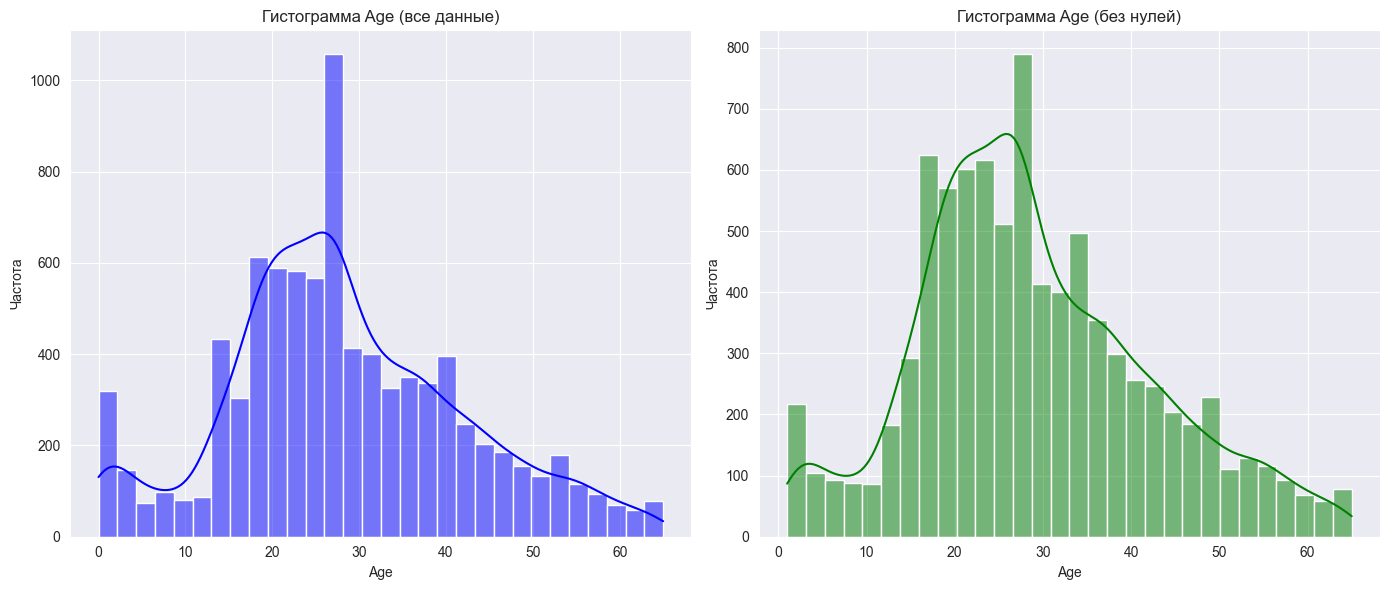

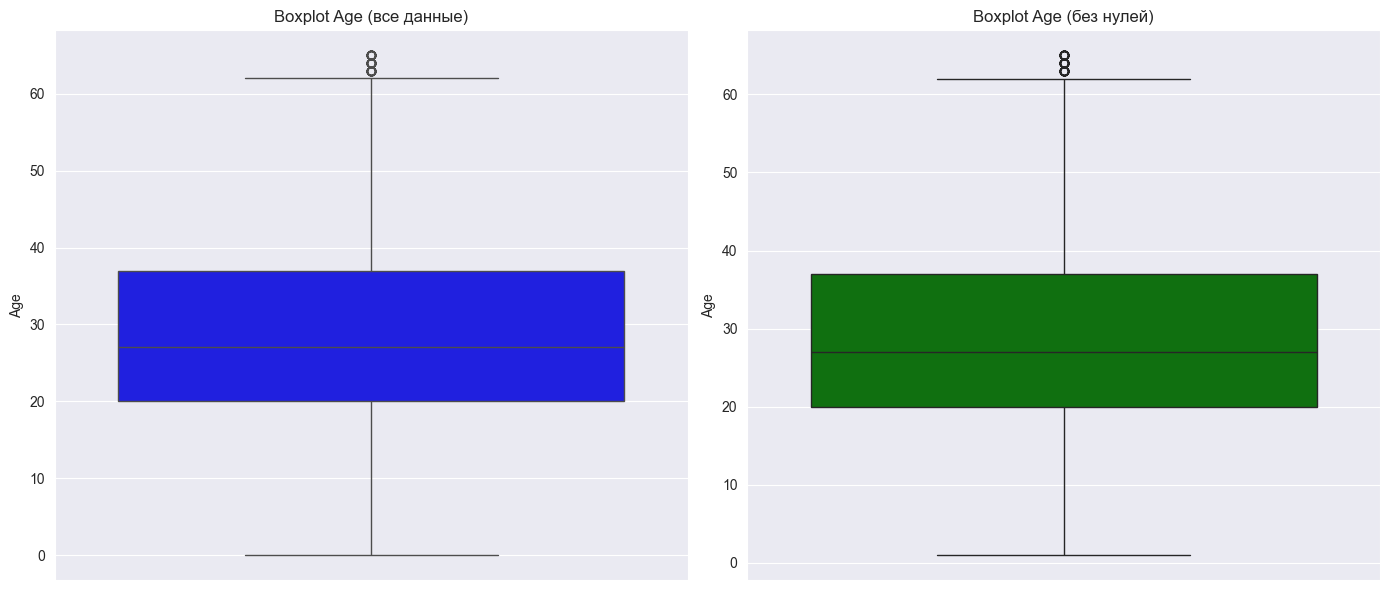

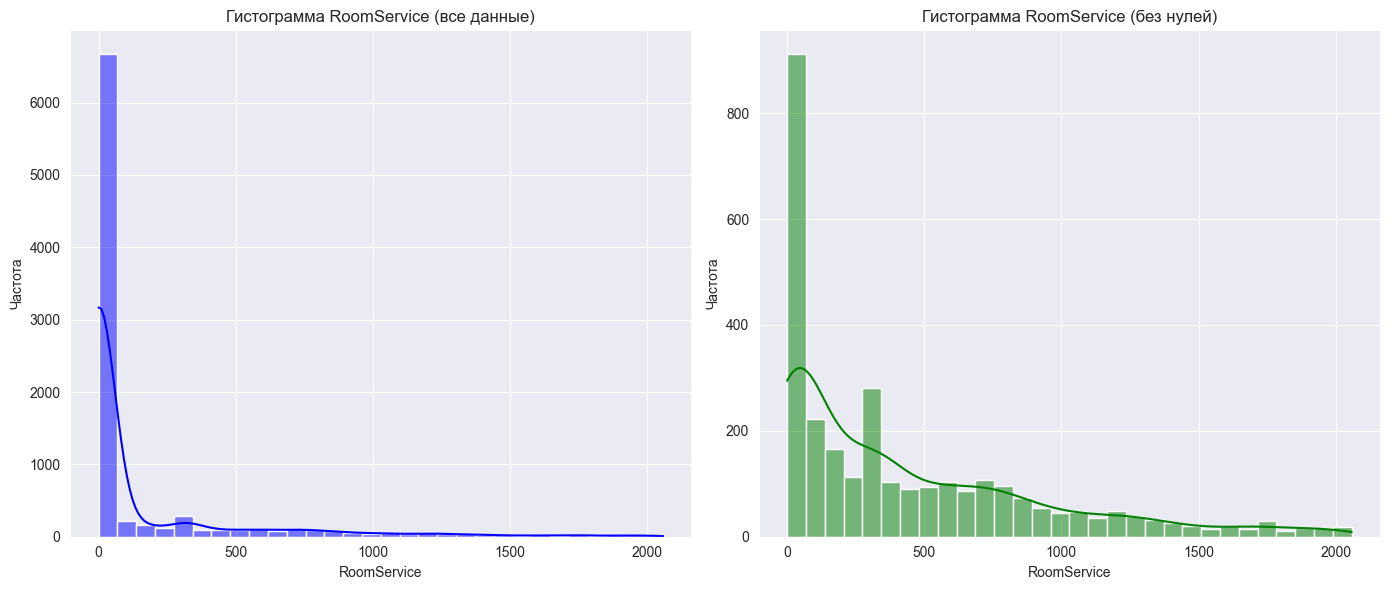

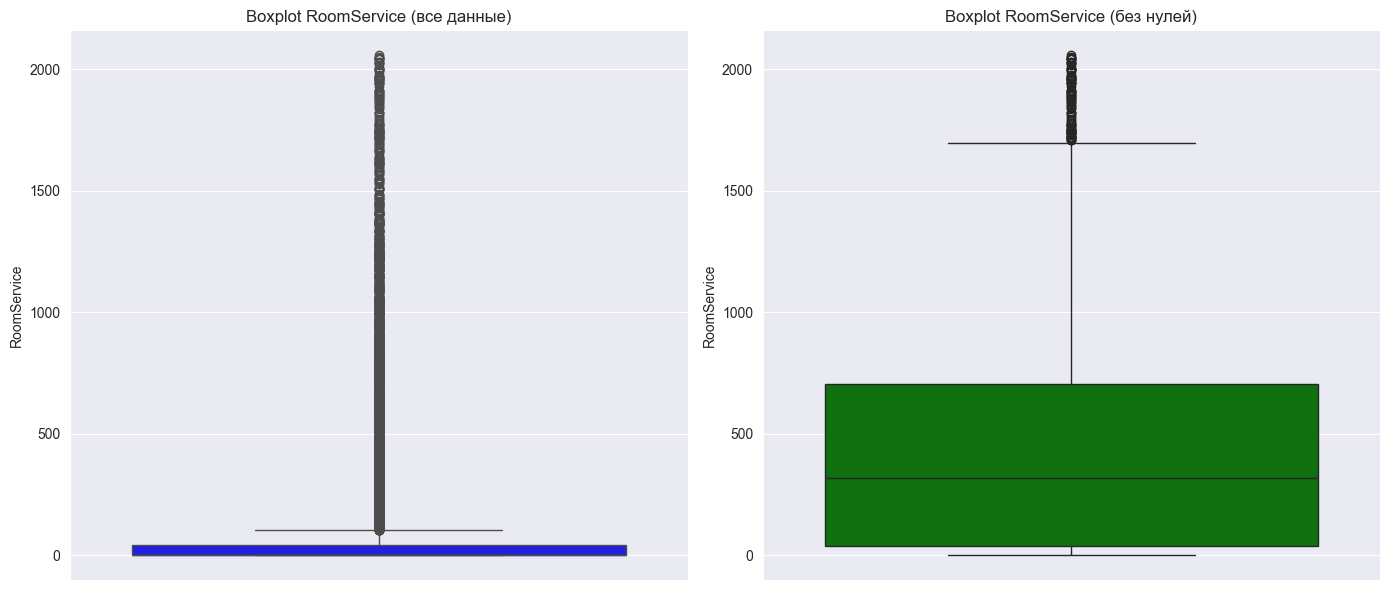

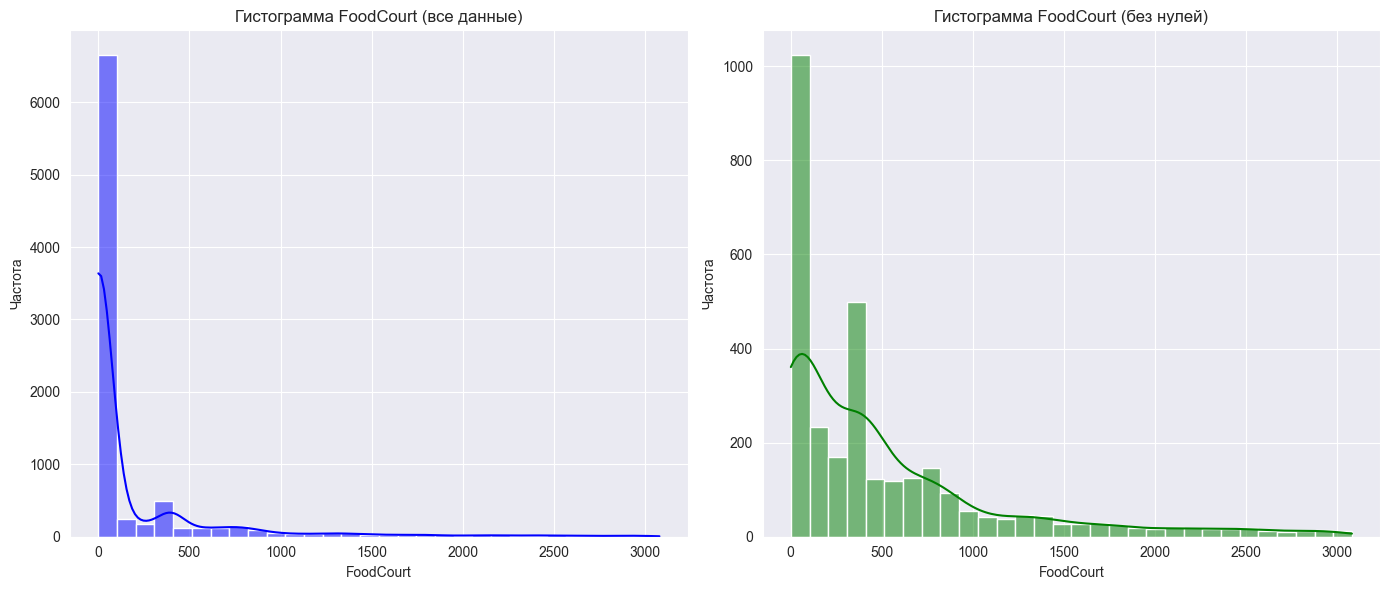

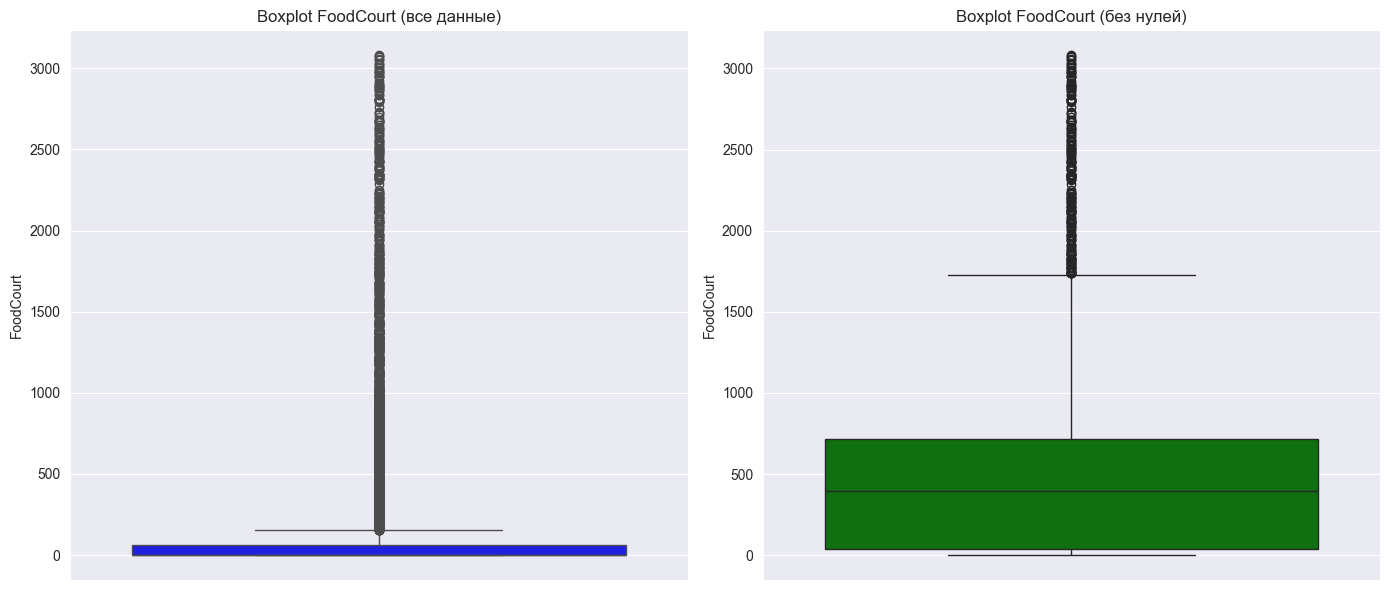

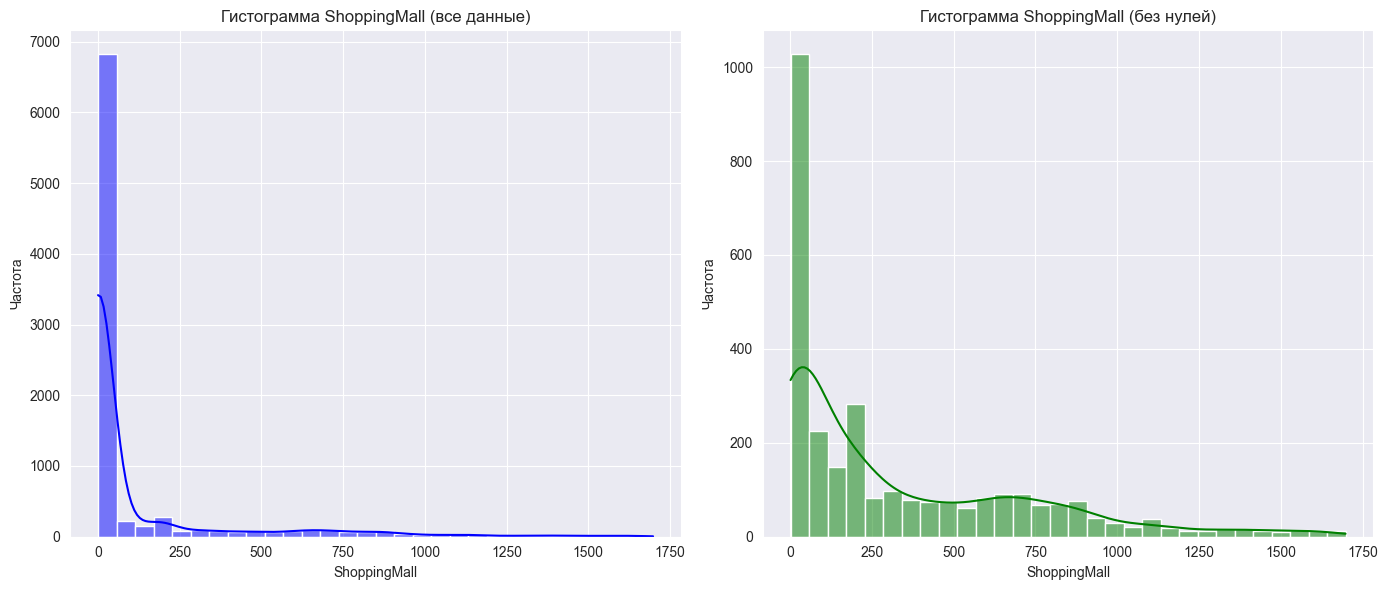

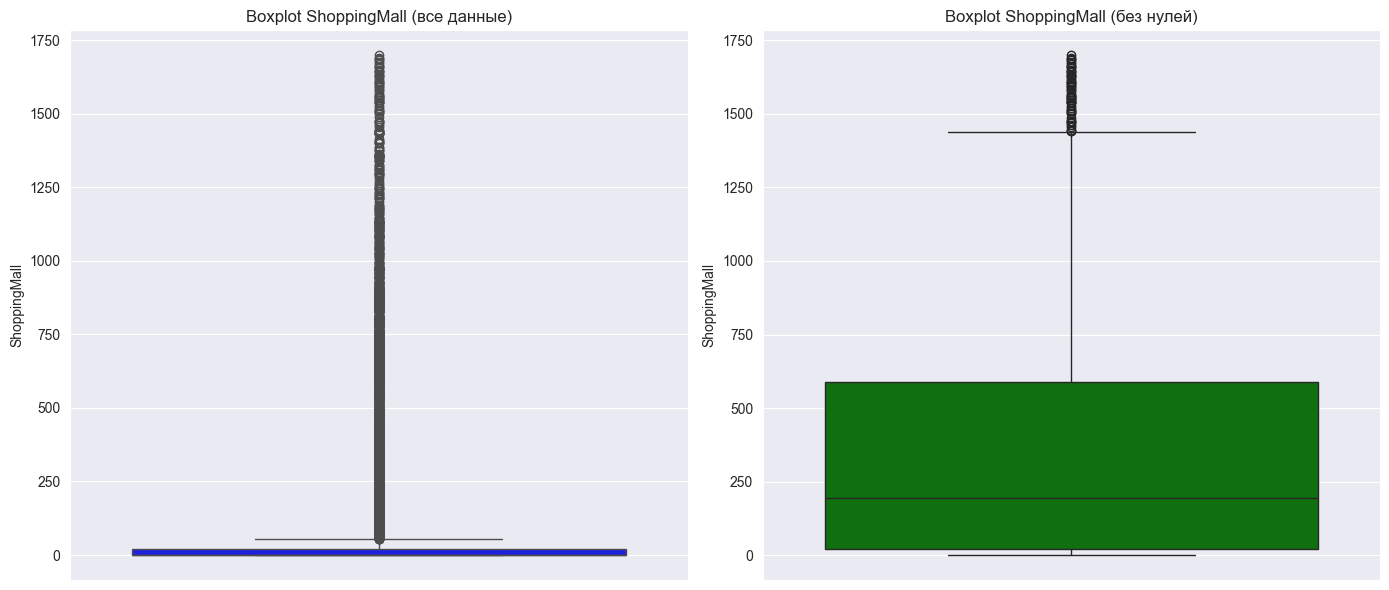

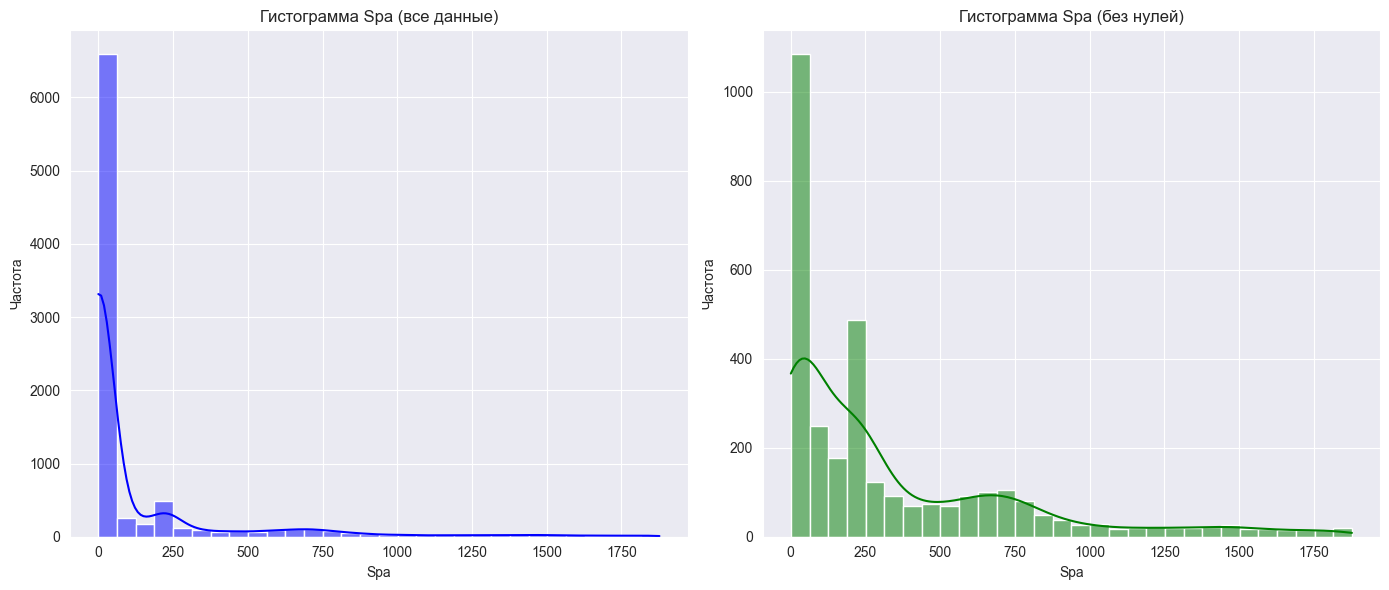

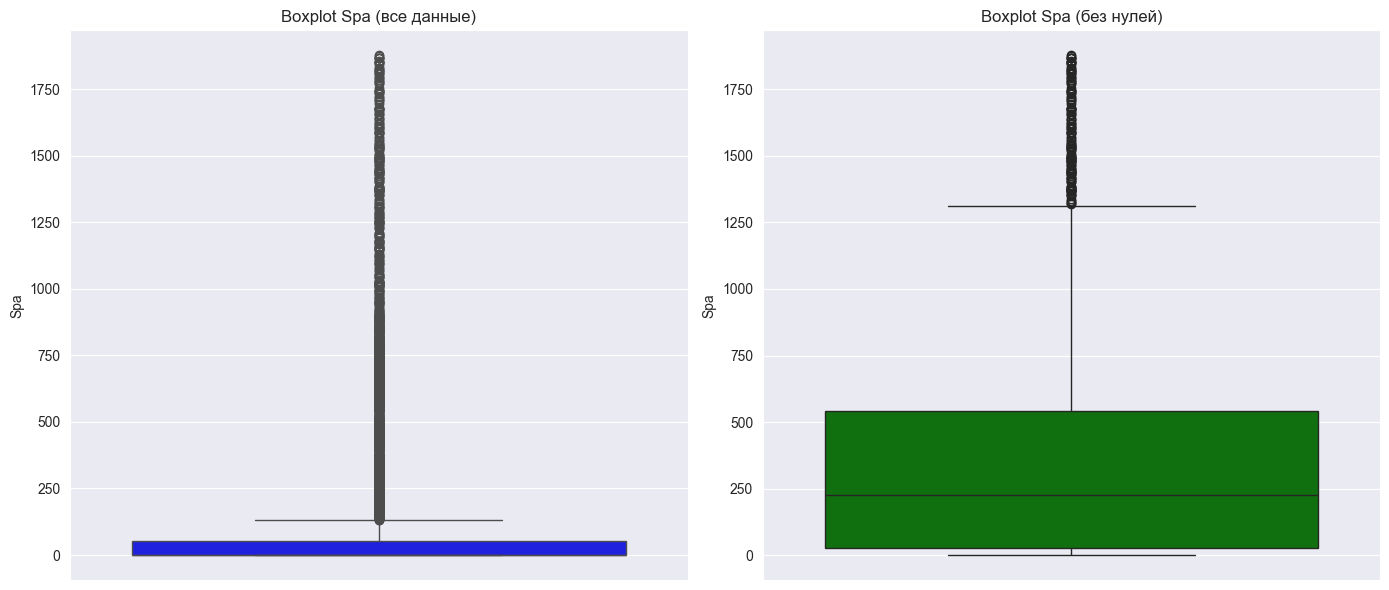

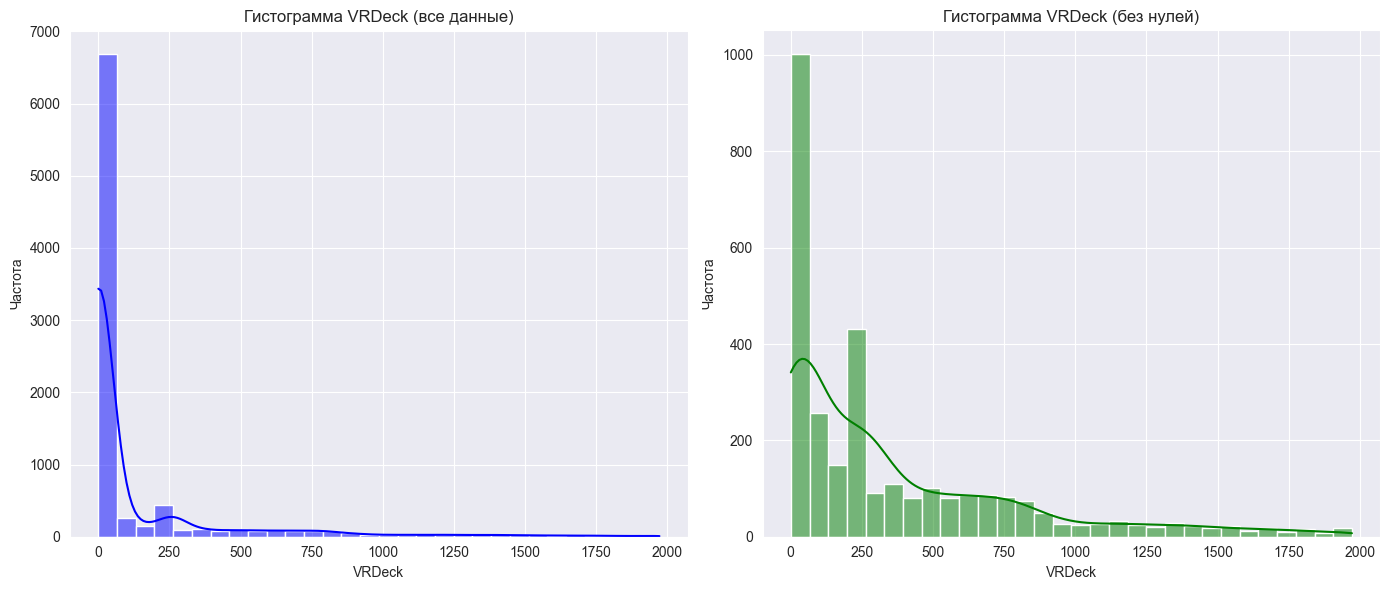

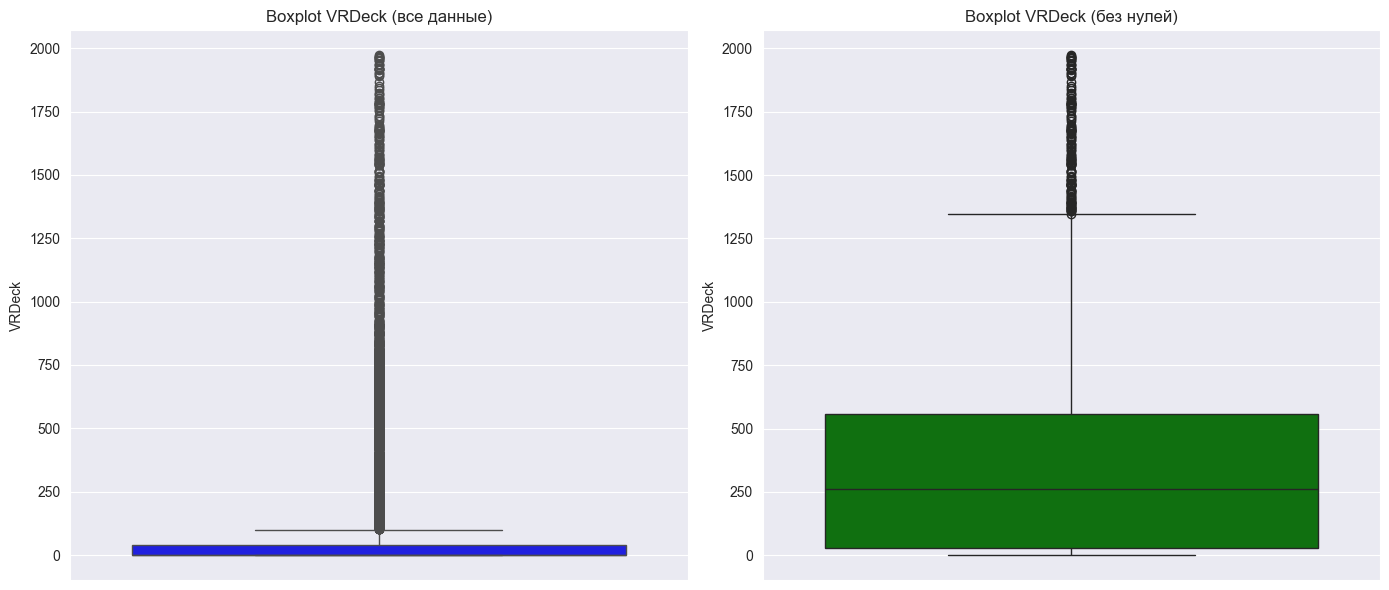

In [304]:
for col in numeric_cols:
    non_zero_data = data[data[col] > 0]

    figGist, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(data[col], bins=30, kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f'Гистограмма {col} (все данные)')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Частота')

    sns.histplot(non_zero_data[col], bins=30, kde=True, ax=axes[1], color='green')
    axes[1].set_title(f'Гистограмма {col} (без нулей)')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Частота')

    plt.tight_layout()
    plt.show()

    figBoxplot, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.boxplot(data=data, y=col, ax=axes[0], color='blue')
    axes[0].set_title(f'Boxplot {col} (все данные)')

    sns.boxplot(data=non_zero_data, y=col, ax=axes[1], color='green')
    axes[1].set_title(f'Boxplot {col} (без нулей)')

    plt.tight_layout()
    plt.show()

### **3. Кодирование категориальных признаков**

In [305]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(data.head())

    Age  RoomService  FoodCourt  ShoppingMall    Spa  VRDeck  Transported  \
0  39.0          0.0        0.0           0.0    0.0     0.0        False   
1  24.0        109.0        9.0          25.0  549.0    44.0         True   
2  58.0         43.0      396.5           0.0  226.5    49.0        False   
3  33.0          0.0     1283.0         371.0  226.5   193.0        False   
4  16.0        303.0       70.0         151.0  565.0     2.0         True   

   HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  \
0               True            False           False   
1              False            False           False   
2               True            False           False   
3               True            False           False   
4              False            False           False   

   Destination_PSO J318.5-22  Destination_TRAPPIST-1e  VIP_True  
0                      False                     True     False  
1                      False                     True     Fals

### **4. Создание новых признаков**

In [306]:
data['TotalService'] = data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

print(data[['TotalService']].head())

   TotalService
0           0.0
1         736.0
2         715.0
3        2073.5
4        1091.0


### **5. Разделение данных**

In [307]:
X = data.drop(columns=['Transported'])
y = data['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(6954, 13) (1739, 13)


### **6. Масштабирование данных**

In [308]:
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print(X_train.head())
print(X_test.head())

           Age  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
2333 -0.027810    -0.425494  -0.288185     -0.406519  1.748963 -0.411153   
2589 -0.830867    -0.425494   2.229192     -0.291850 -0.415349 -0.411153   
8302 -0.027810    -0.425494  -0.409638     -0.406519 -0.415349 -0.411153   
8177 -0.611851    -0.425494  -0.405221      0.662490  2.804725 -0.411153   
500   0.556231    -0.425494  -0.409638     -0.406519 -0.415349 -0.411153   

      HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  \
2333              False            False           False   
2589              False            False           False   
8302               True            False            True   
8177              False             True           False   
500                True            False            True   

      Destination_PSO J318.5-22  Destination_TRAPPIST-1e  VIP_True  \
2333                      False                     True     False   
2589                      False           

## **3. Построение и оценка модели.  Определение оптимального количества соседей.**

### **1. Подбор оптимального количества соседей**

In [309]:
kNN = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(1, 40),
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=kNN, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший результат (точность): {grid_search.best_score_}")

best_knn = grid_search.best_estimator_

test_accuracy = best_knn.score(X_test, y_test)
print(f"Точность на тестовой выборке: {test_accuracy}")

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 27, 'weights': 'uniform'}
Лучший результат (точность): 0.7433148348323498
Точность на тестовой выборке: 0.745830937320299


### **2. Построение итоговой модели и её оценка**

In [310]:
kNN_final = KNeighborsClassifier(n_neighbors=27, metric='euclidean', weights='uniform')

kNN_final.fit(X_train, y_train)

y_pred = kNN_final.predict(X_test)

print(f"Оптимальное количество соседей: {kNN_final.n_neighbors}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовой выборке: {accuracy:.4f}")


class_report = classification_report(y_test, y_pred)
print("Классификационный отчет:")
print(class_report)

Оптимальное количество соседей: 27
Точность на тестовой выборке: 0.7458
Классификационный отчет:
              precision    recall  f1-score   support

       False       0.71      0.82      0.76       861
        True       0.79      0.67      0.73       878

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.74      1739
weighted avg       0.75      0.75      0.74      1739



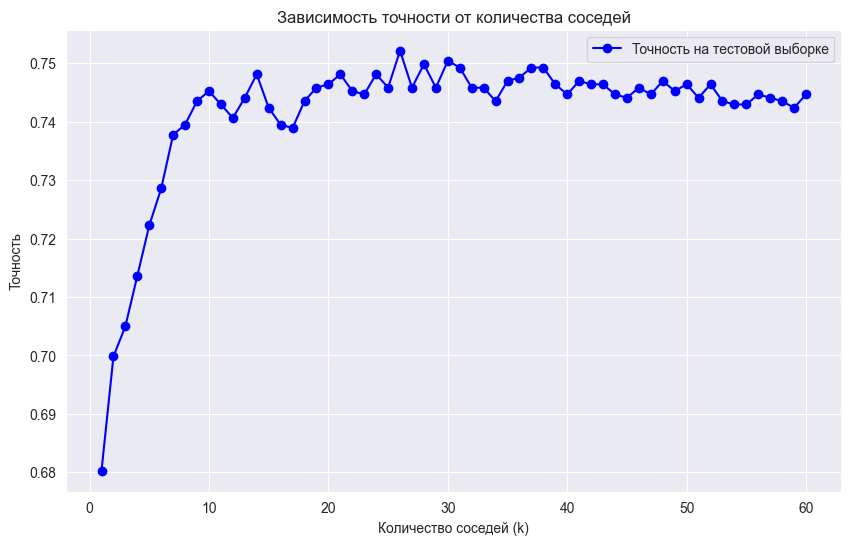

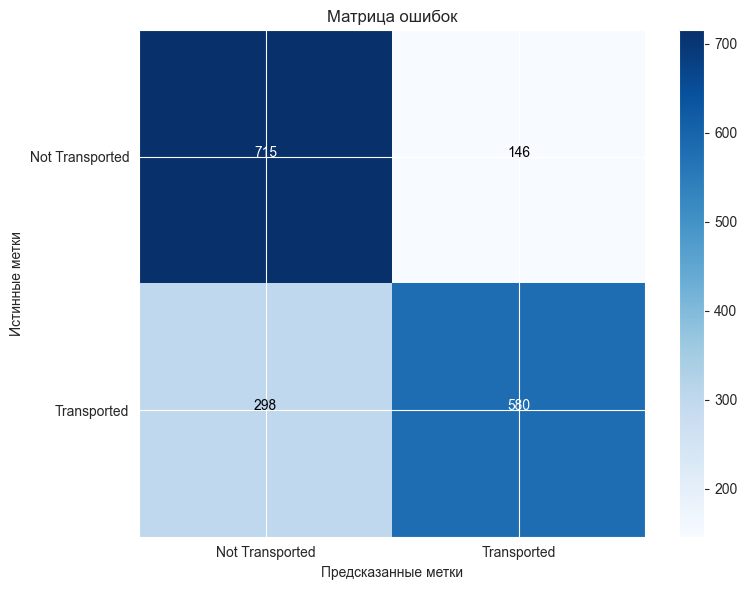

In [311]:
k_range = range(1, 61)
accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o', color='b', label='Точность на тестовой выборке')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность')
plt.title('Зависимость точности от количества соседей')
plt.grid(True)
plt.legend()
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Матрица ошибок')
plt.colorbar()
classes = ['Not Transported', 'Transported']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.tight_layout()
plt.show()